# Writer Name Detection Using YOLO11

In [ ]:
!nvidia-smi

Mon Jan 27 18:33:51 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

# Import All Libraries

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

# Download Dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7UPRU3AfbM5KUNxr2GTg")
project = rf.workspace("mlnayem").project("book-writer-detection")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/Book-Writer-Detection-2'

# Train YOLO11 Model on a Custom Dataset

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50

100% 5.35M/5.35M [00:00<00:00, 88.0MB/s]
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Book-Writer-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

# Examine Training Results

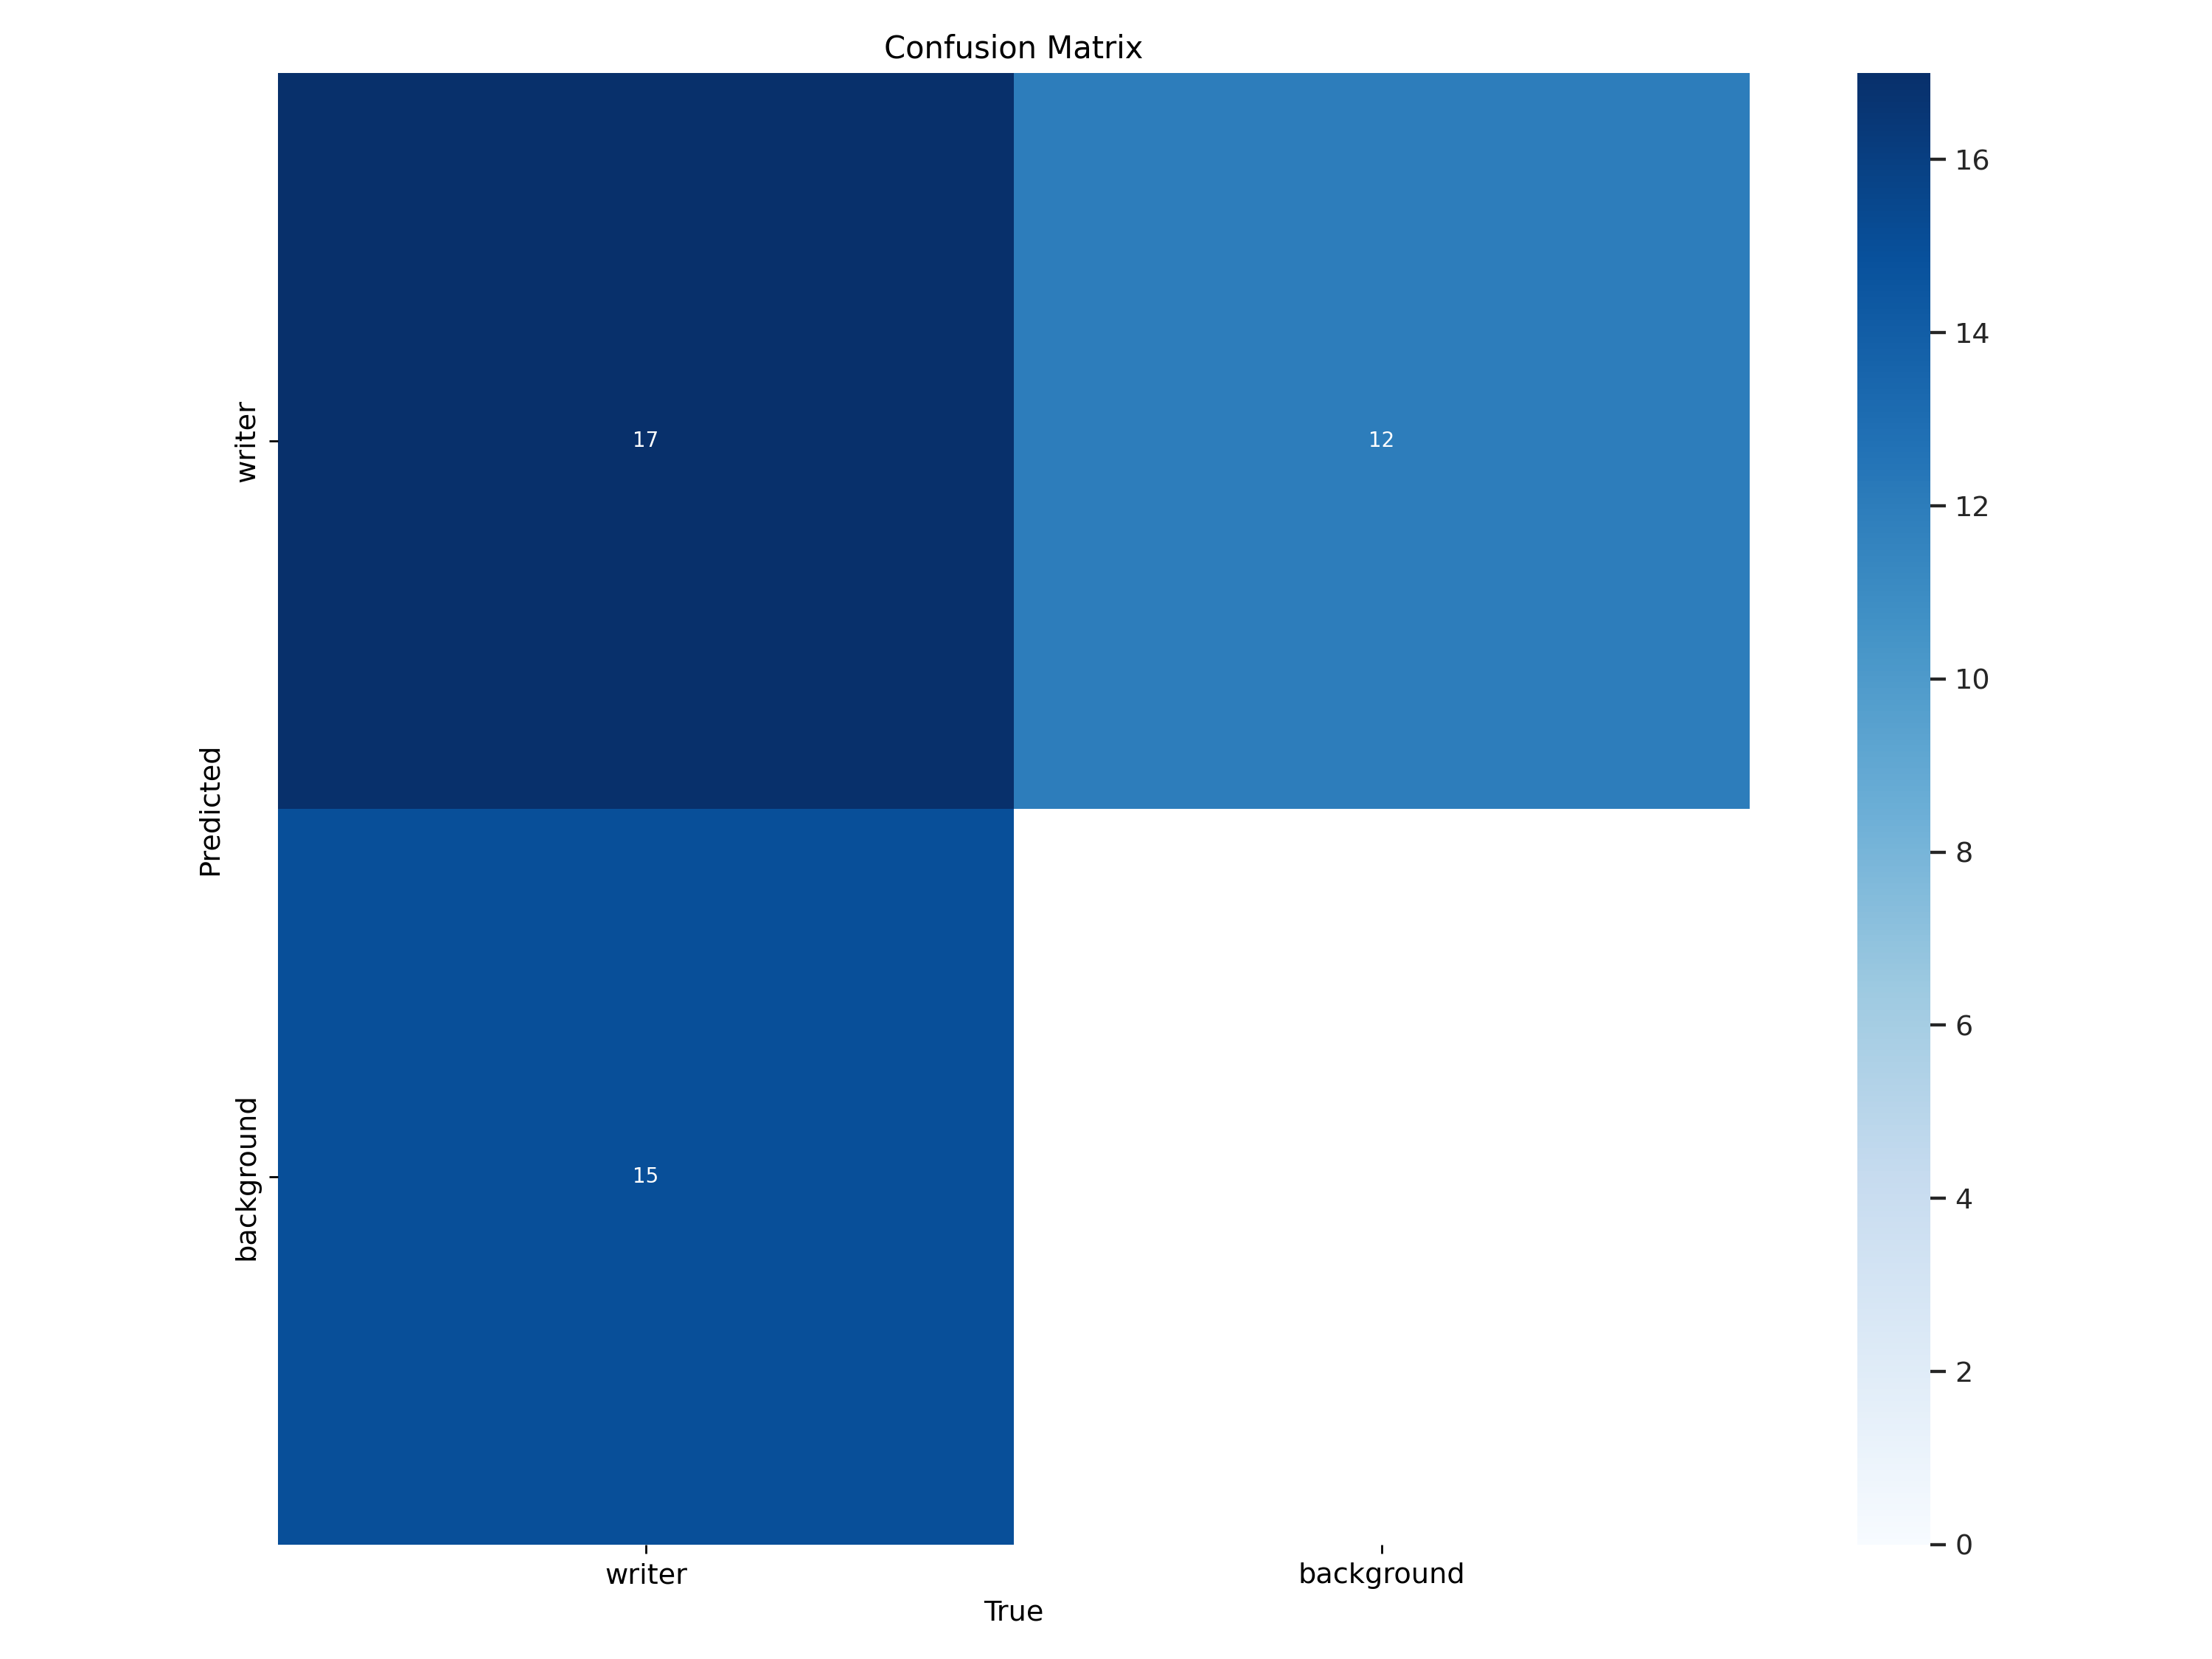

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

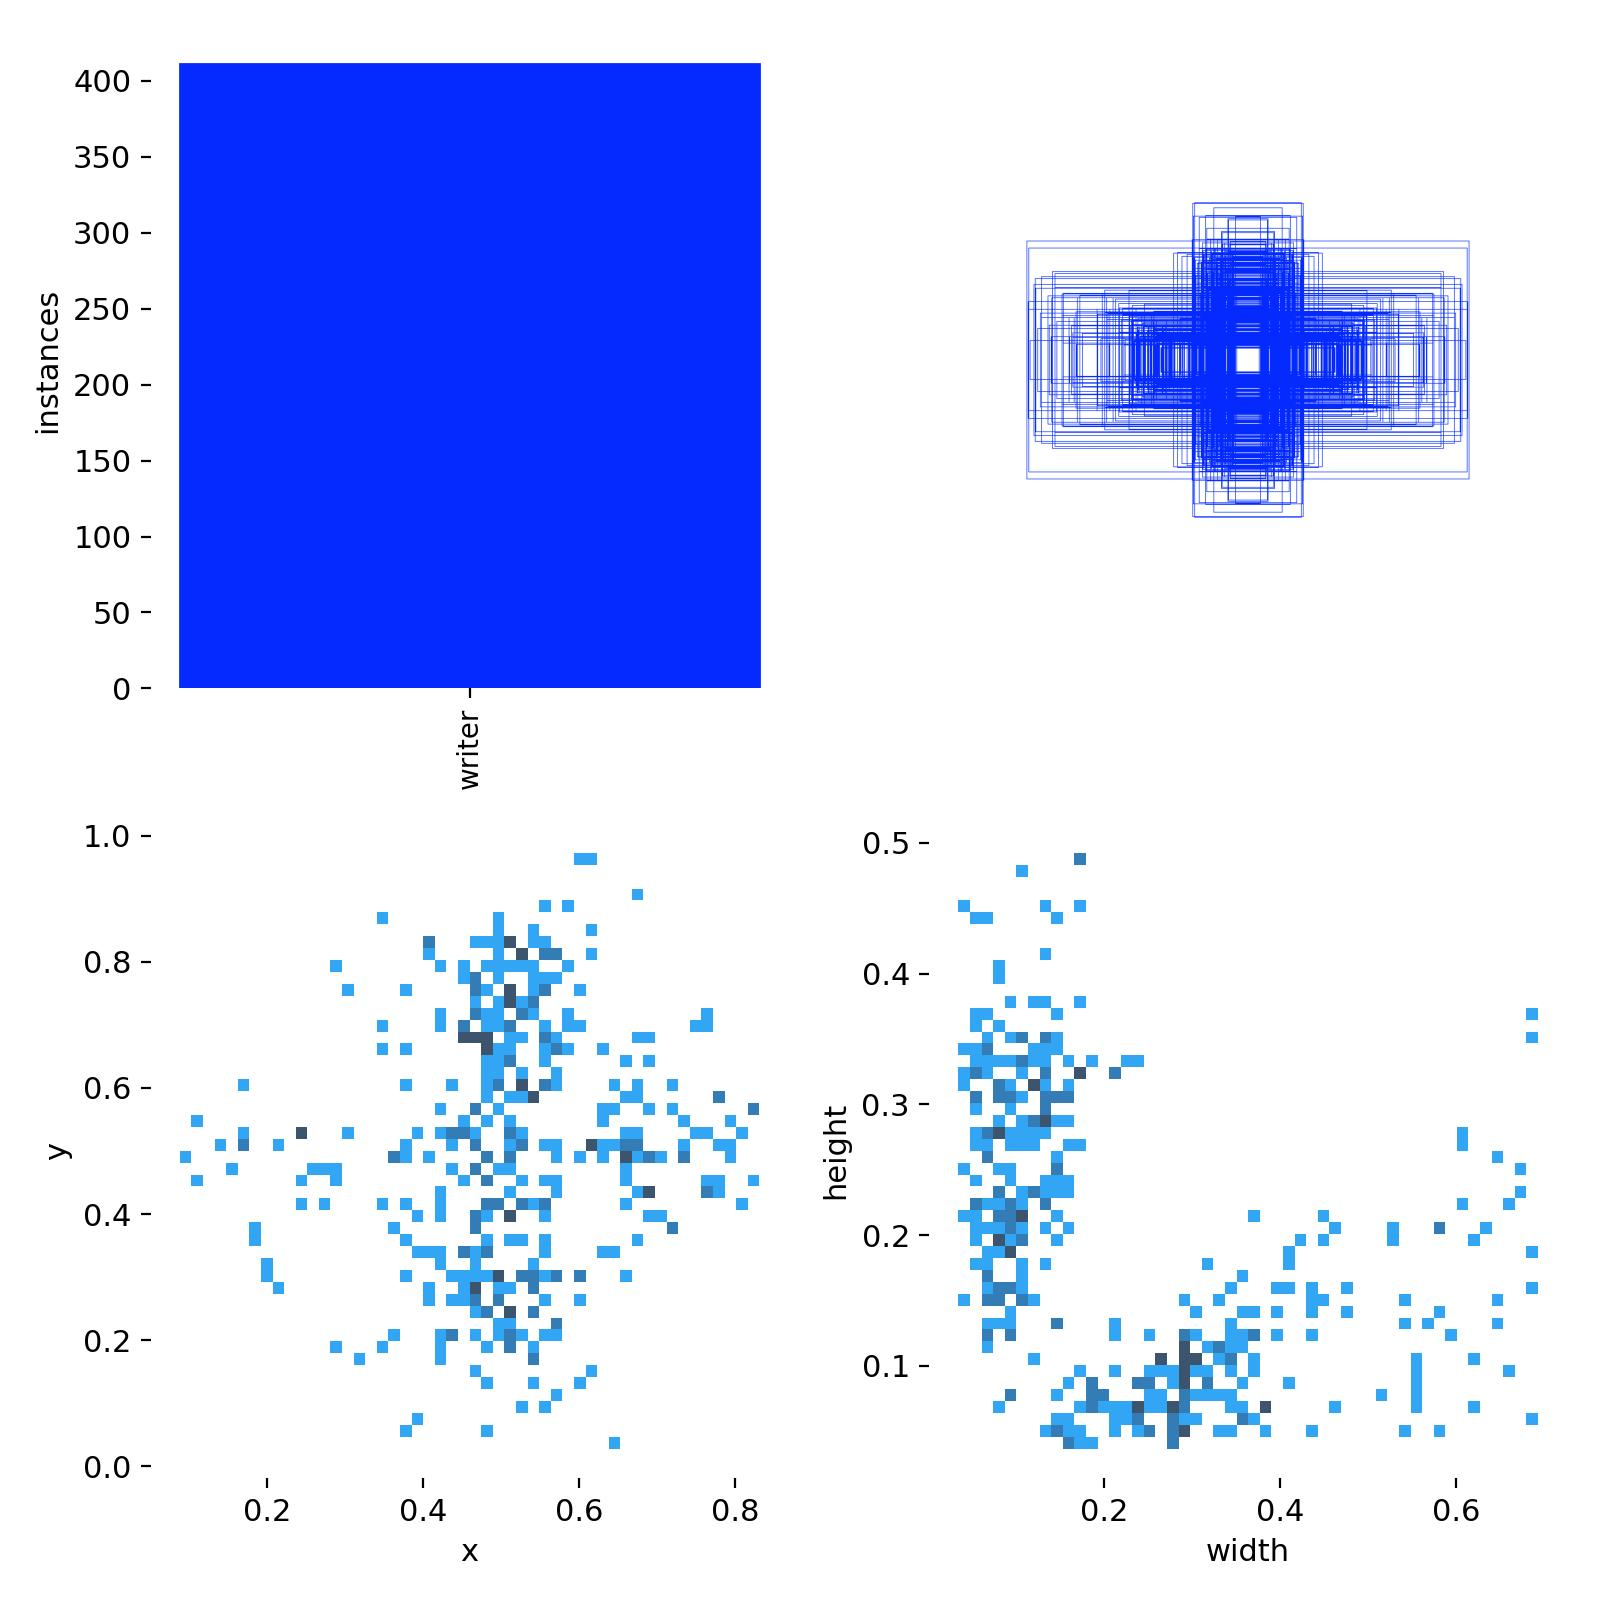

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

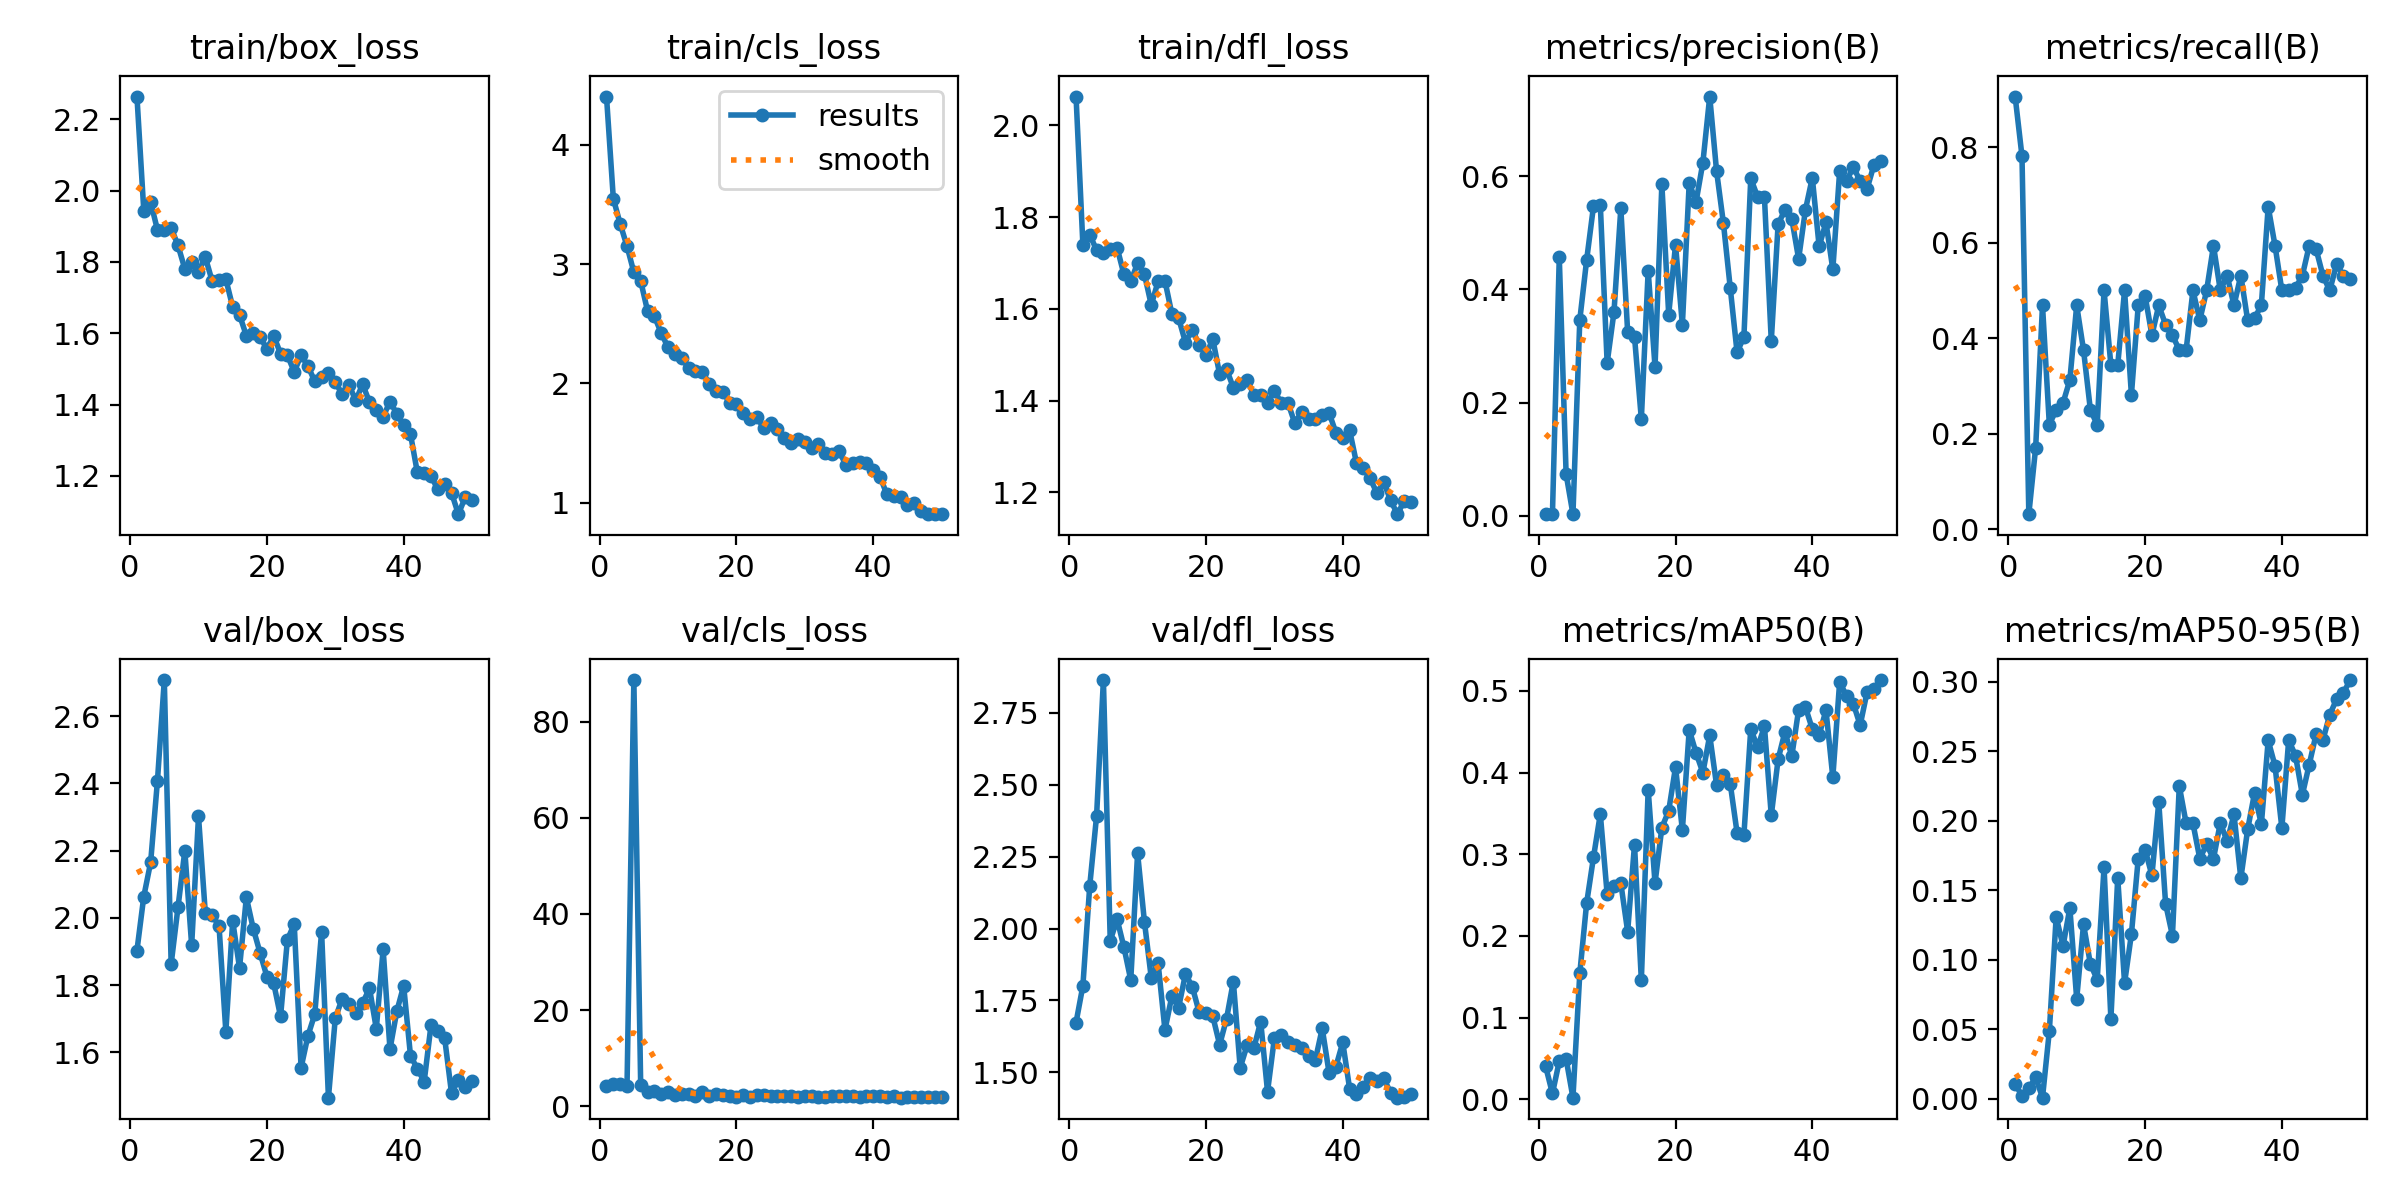

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

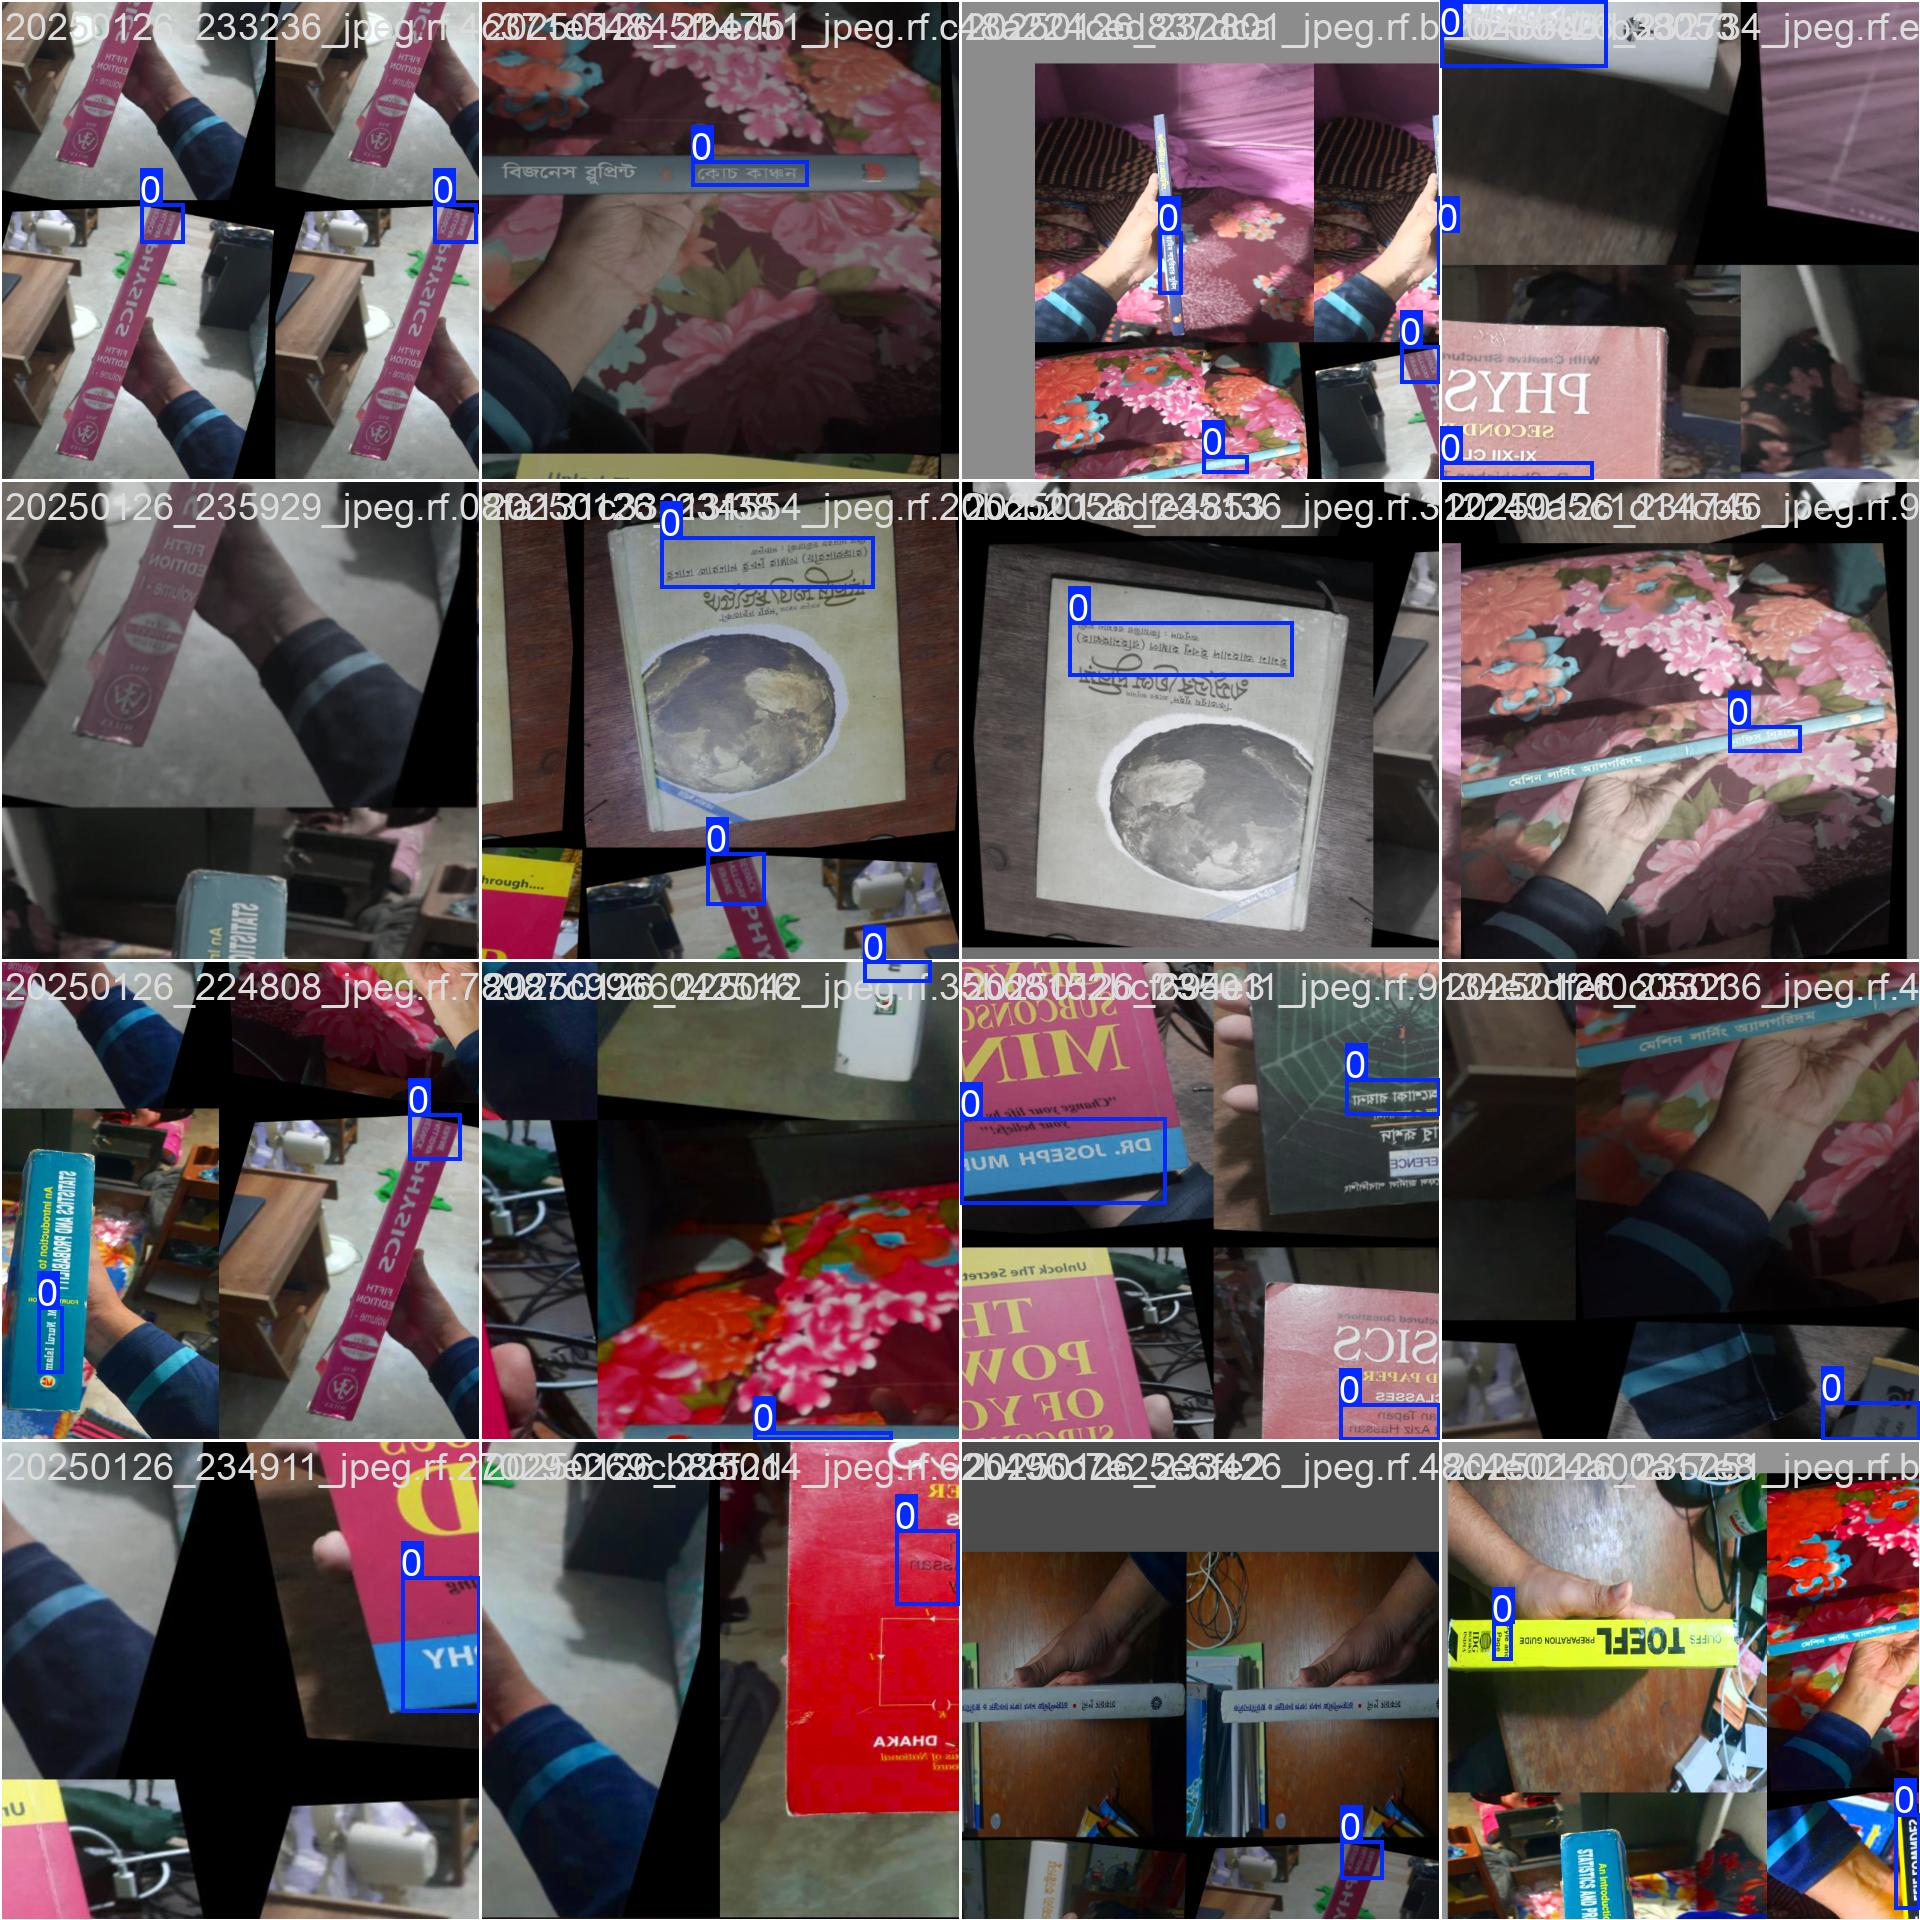

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

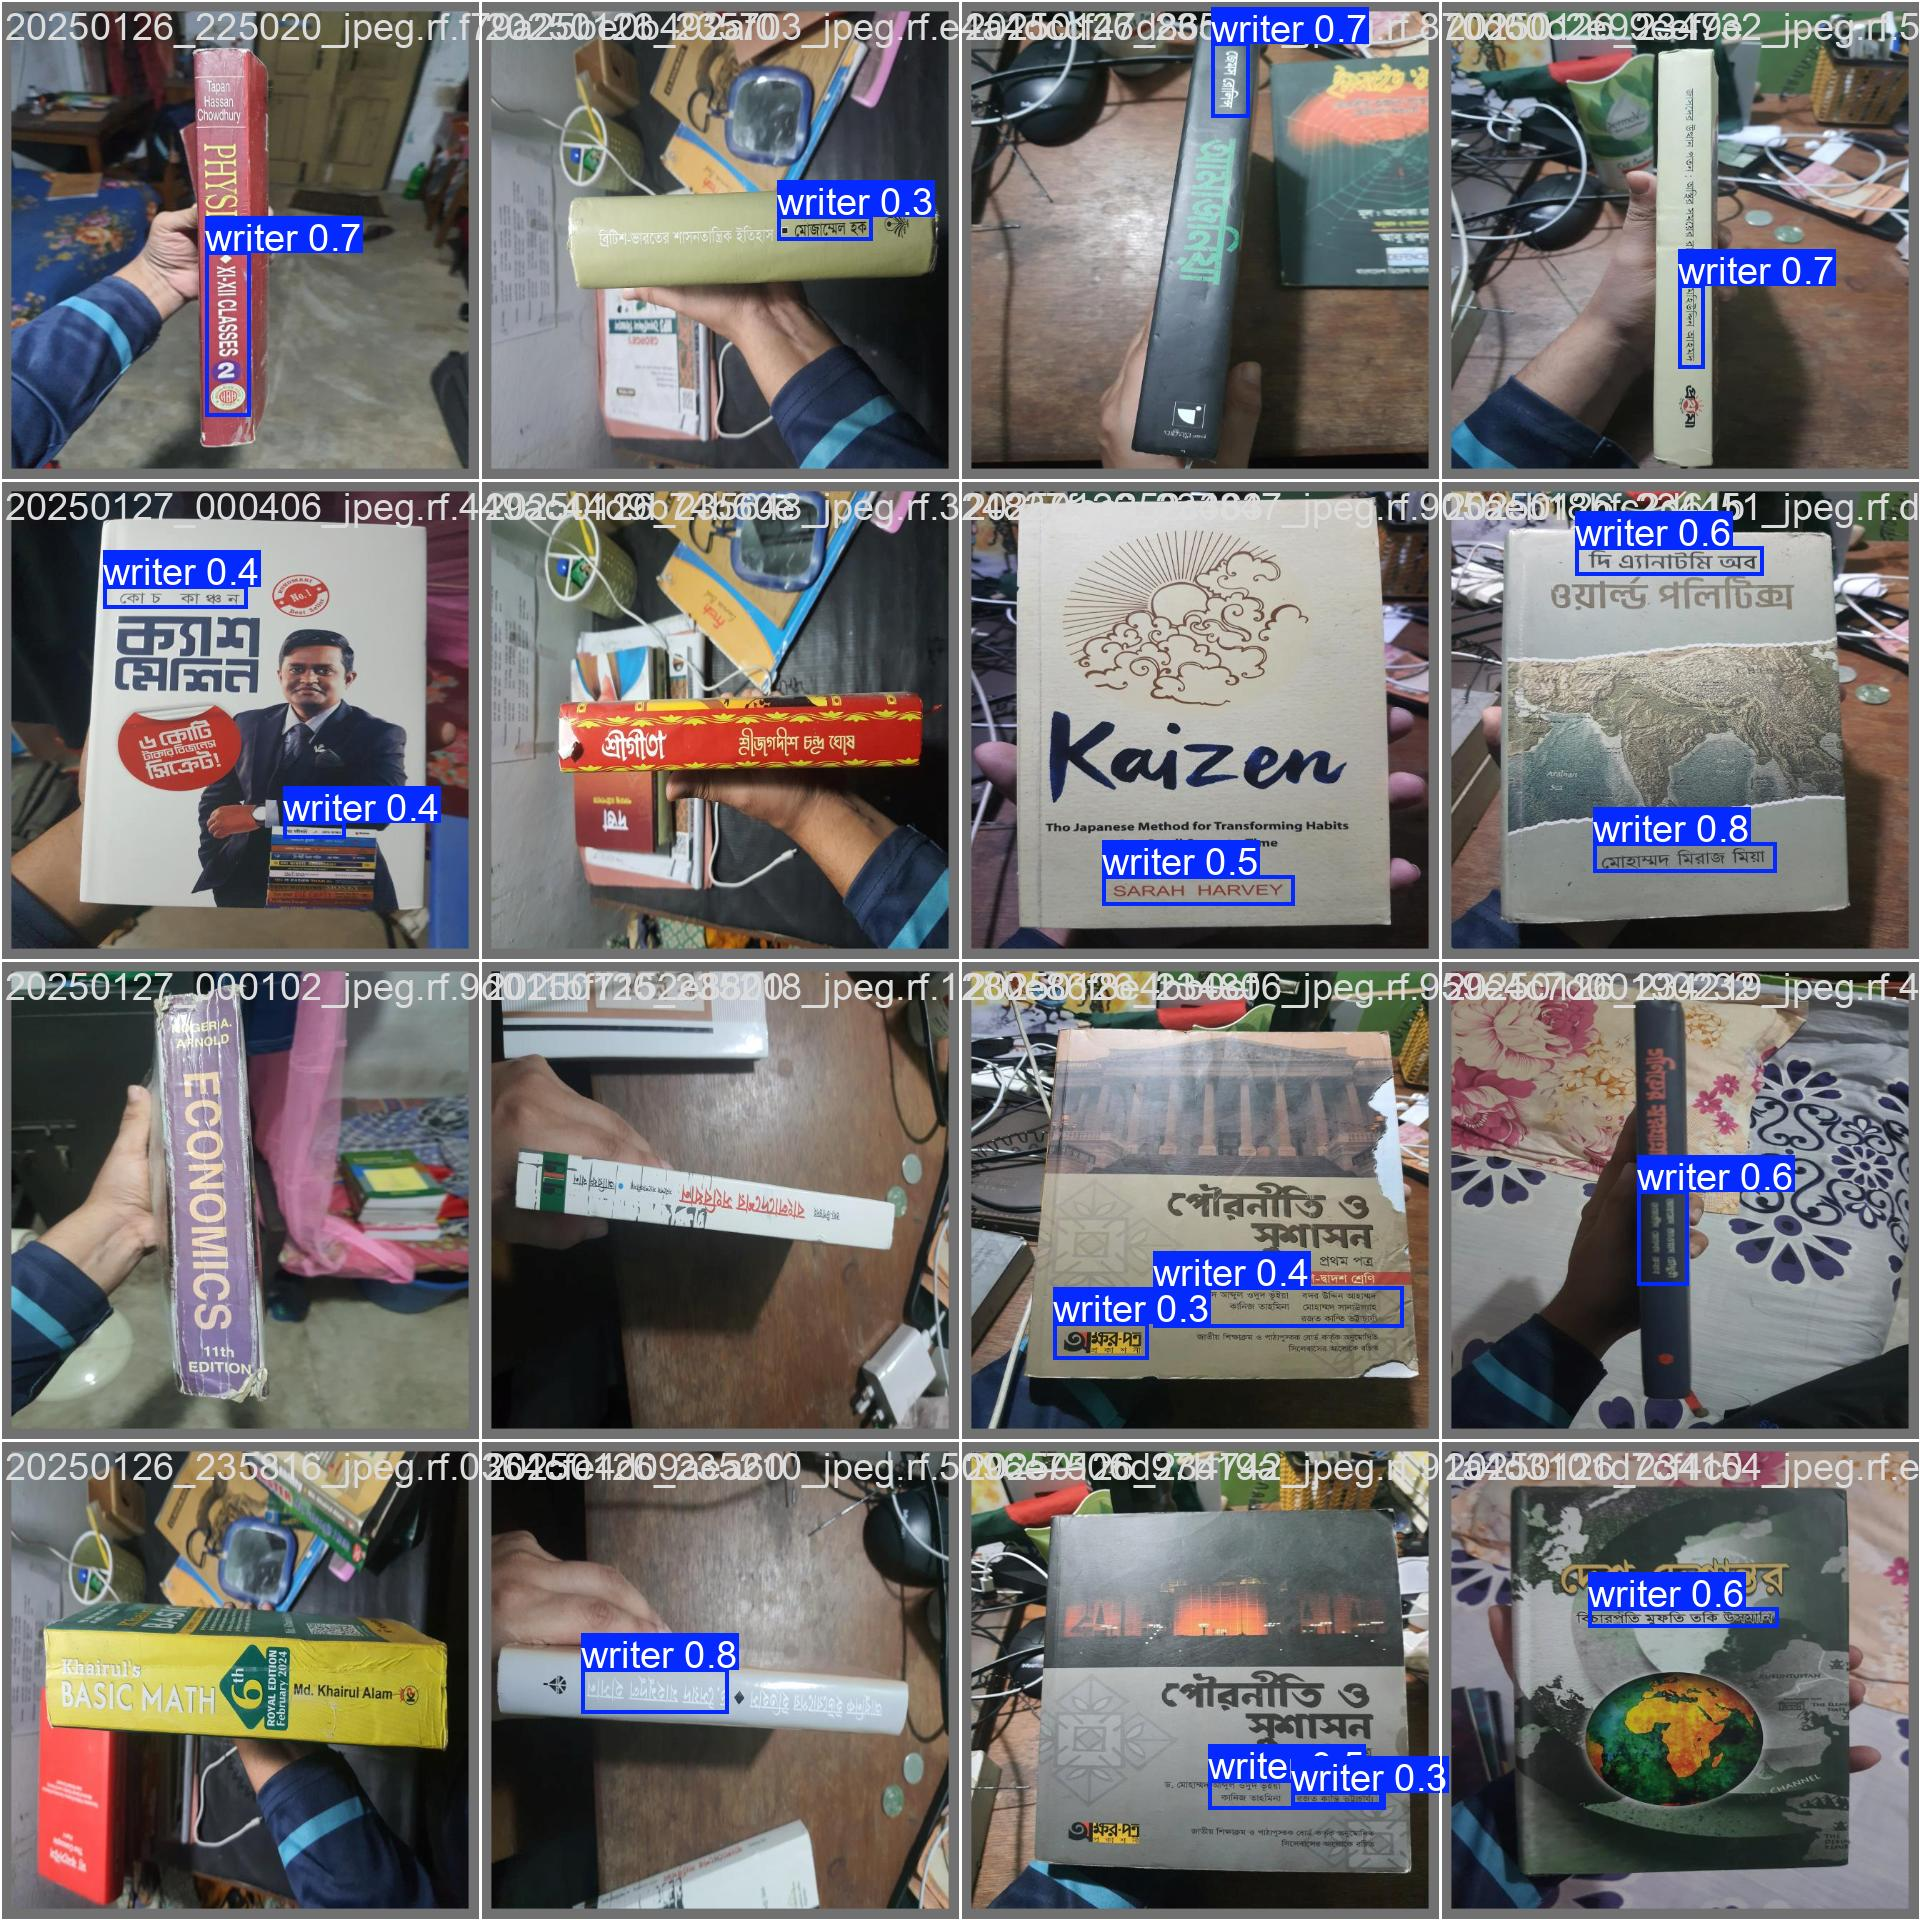

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

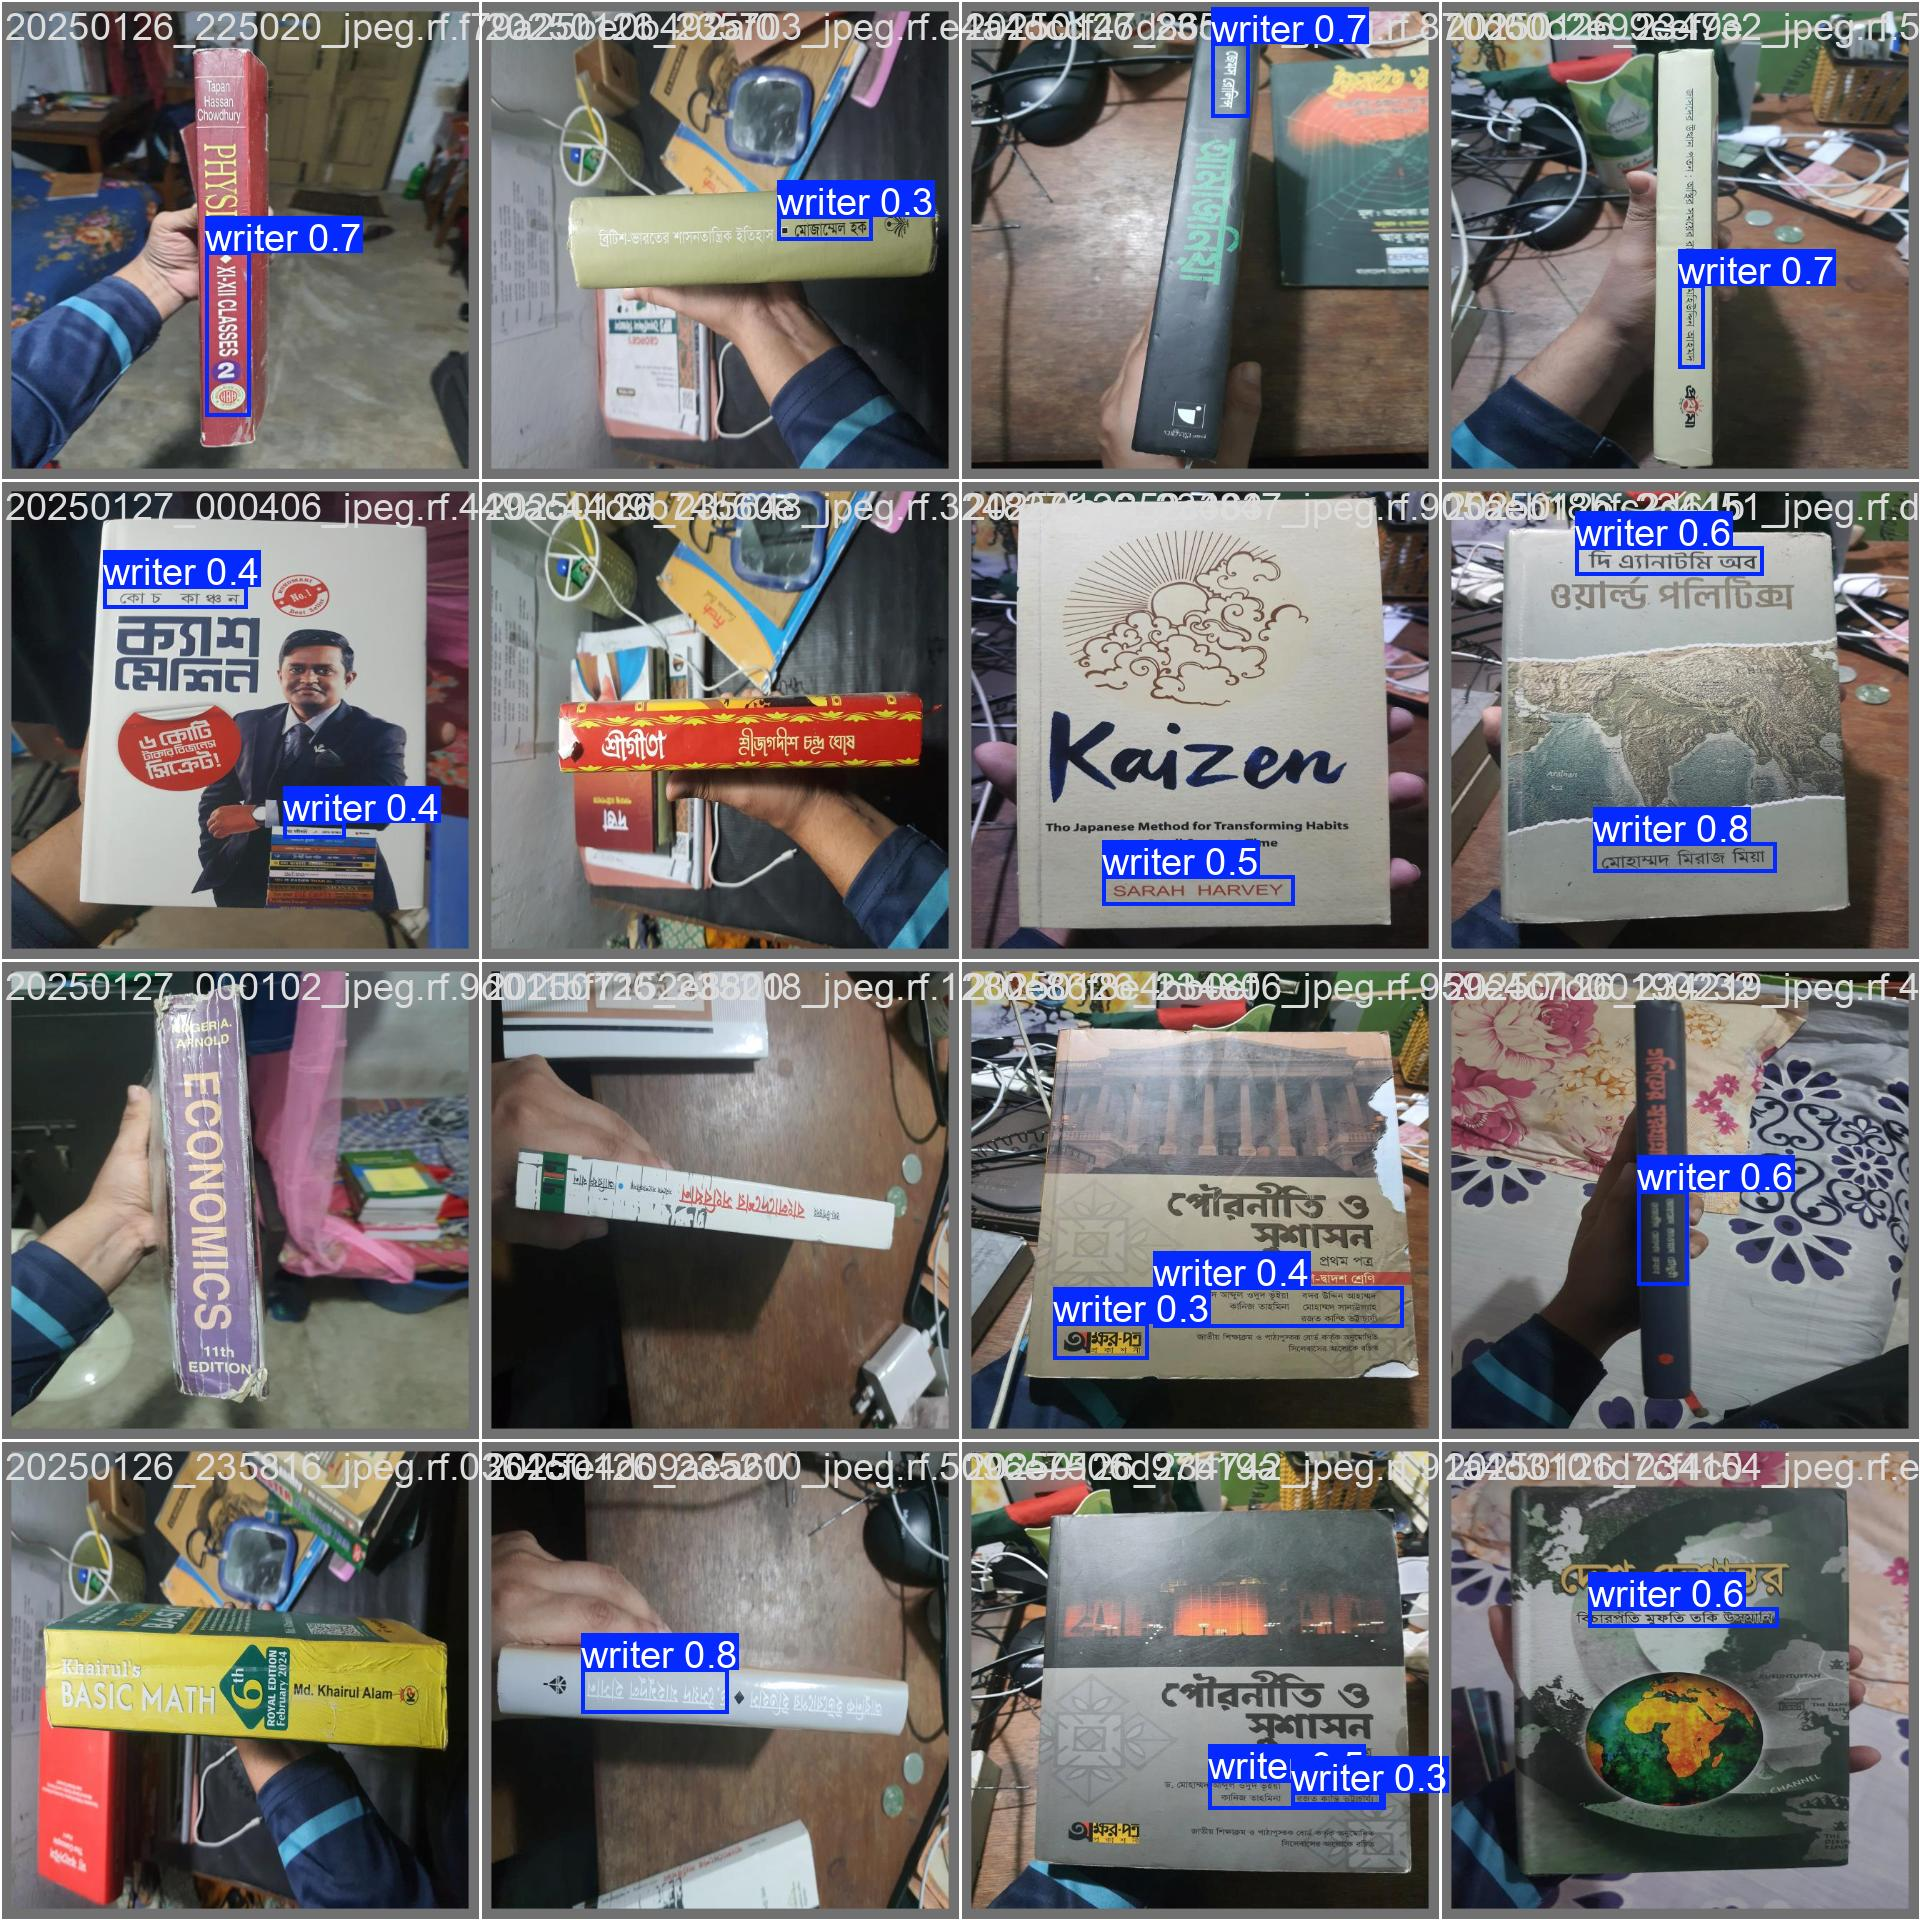

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

# Validate Fine Tune

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Book-Writer-Detection-2/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100% 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.44it/s]
                   all         32         32      0.627      0.526      0.513      0.302
Speed: 0.2ms preprocess, 8.4ms inference, 0.0ms loss, 18.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference with custom model on image

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/19 /content/Book-Writer-Detection-2/test/images/20250126_225036_jpeg.rf.6cd5921918c99db5658f3ece0afc149b.jpg: 640x640 2 writers, 25.7ms
image 2/19 /content/Book-Writer-Detection-2/test/images/20250126_233131_jpeg.rf.605c780f535e2e295796009fd2f6a86d.jpg: 640x640 (no detections), 10.4ms
image 3/19 /content/Book-Writer-Detection-2/test/images/20250126_233218_jpeg.rf.ba851053e0c99eac5bc1ca8f4ce1900e.jpg: 640x640 1 writer, 9.6ms
image 4/19 /content/Book-Writer-Detection-2/test/images/20250126_233222_jpeg.rf.a357eb4a5f2db23142d5d54df5c16ce3.jpg: 640x640 (no detections), 12.0ms
image 5/19 /content/Book-Writer-Detection-2/test/images/20250126_233409_jpeg.rf.c7efe5c468dccd34fa8c0b9a4e312101.jpg: 640x640 1 writer, 13.5ms
image 6/19 /content/Book-Writer-Detection-2/test/images/20250126_233613_jpeg.rf.0a6ec505814231cdf7249d953

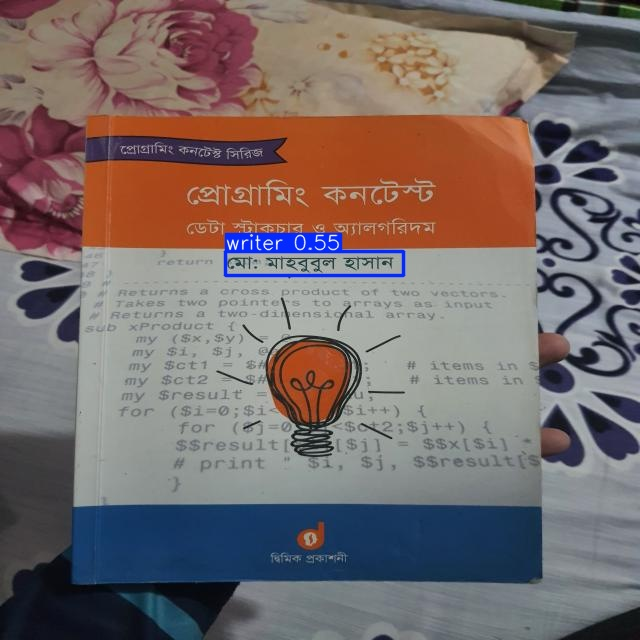

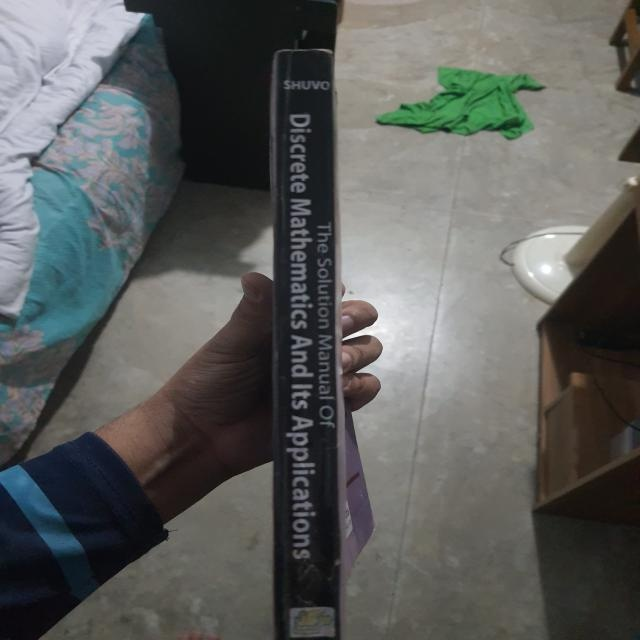

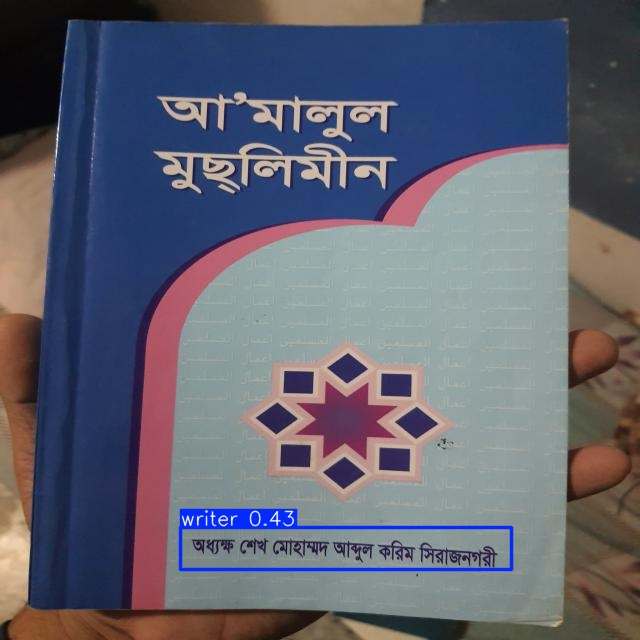

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")